# Main Notebook: Data Preprocessing, Feature Engineering, Scaling, and Splitting

s

## Step 1: Import Libraries and Configuration
In this step, we import necessary libraries and configurations to set up our environment.

In [9]:
import json
import pandas as pd # type: ignore
import sys
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Add the utils and scripts directories to the Python path
sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), '..', 'utils'))
sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), '..', 'scripts'))

# Load configuration file from the main directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
config_path = os.path.join(notebook_dir, '..', 'config.json')

print(f"Config path: {config_path}")
with open(config_path, 'r') as f:
    config = json.load(f)

# Convert relative paths in the configuration file to absolute paths
project_root = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
raw_data_path = os.path.join(project_root, config['raw_data_path'])
interim_cleaned_data_path = os.path.join(project_root, config['interim_cleaned_data_path'])
preprocessed_data_path = os.path.join(project_root, config['preprocessed_data_path'])

# Paths for saving training and testing datasets
train_path = os.path.join(project_root, 'data', 'train', 'train_dataset.csv')
test_path = os.path.join(project_root, 'data', 'test', 'test_dataset.csv')

# Path for saving the processed dataset with new features
processed_data_path = os.path.join(project_root, 'data', 'processed', 'processed_dataset_with_features.csv')

# Path for saving EDA figures
eda_figures_path = os.path.join(project_root, 'Data_Preparation', 'eda_visualizations')
os.makedirs(eda_figures_path, exist_ok=True)

Config path: /Users/bchaudhary/Desktop/Customer-Churn-Analysis/notebooks/../config.json


## Step 2: Import Custom Modules
In this step, we import custom modules for data loading, cleaning, feature engineering, scaling, and exploratory data analysis (EDA).

In [10]:
from data_loader import load_data
from data_cleaner import clean_data
from data_splitter import split_data
from feature_engineering import create_new_features
from scaler import apply_standard_scaling, apply_min_max_scaling
from eda_utils import plot_distribution, plot_boxplots, plot_categorical, plot_correlation_matrix, plot_pairplots


## Step 3: Load and Clean Data
Load the raw dataset from the specified path and clean it using the clean_data function.

In [11]:
# Load the raw data from the specified path
df = load_data(raw_data_path)
# Check if data is loaded correctly; if not, print an error message and exit
if df is None:
    print(f"File not found at {raw_data_path}. Exiting the script.")
else:
    print(f"Raw data loaded successfully from {raw_data_path}")
    display(df.head())

Data loaded successfully from /Users/bchaudhary/Desktop/Customer-Churn-Analysis/data/raw/Dataset (ATS)-1.csv
Raw data loaded successfully from /Users/bchaudhary/Desktop/Customer-Churn-Analysis/data/raw/Dataset (ATS)-1.csv


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,29.85,No
1,Male,0,No,34,Yes,No,DSL,One year,56.95,No
2,Male,0,No,2,Yes,No,DSL,Month-to-month,53.85,Yes
3,Male,0,No,45,No,No,DSL,One year,42.30,No
4,Female,0,No,2,Yes,No,Fiber optic,Month-to-month,70.70,Yes


In [12]:
# Clean the loaded data using the clean_data function
df_cleaned = clean_data(df)
# Check if data cleaning was successful; if not, print an error message and exit
if df_cleaned is None:
    print("Data cleaning failed. Exiting the script.")
else:
    print("Data cleaned successfully.")
    display(df_cleaned.head())

Missing values handled by dropping rows with missing values.
Categorical columns identified: Index(['gender', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'Contract', 'Churn'],
      dtype='object')
Categorical columns ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn'] encoded.
Data cleaned successfully.


,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes
0,0,1,29.85,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0,2,53.85,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,2,70.70,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


## Step 4: Perform Exploratory Data Analysis (EDA)
Perform EDA on the cleaned dataset to gain insights and visualize distributions, correlations, and relationships.

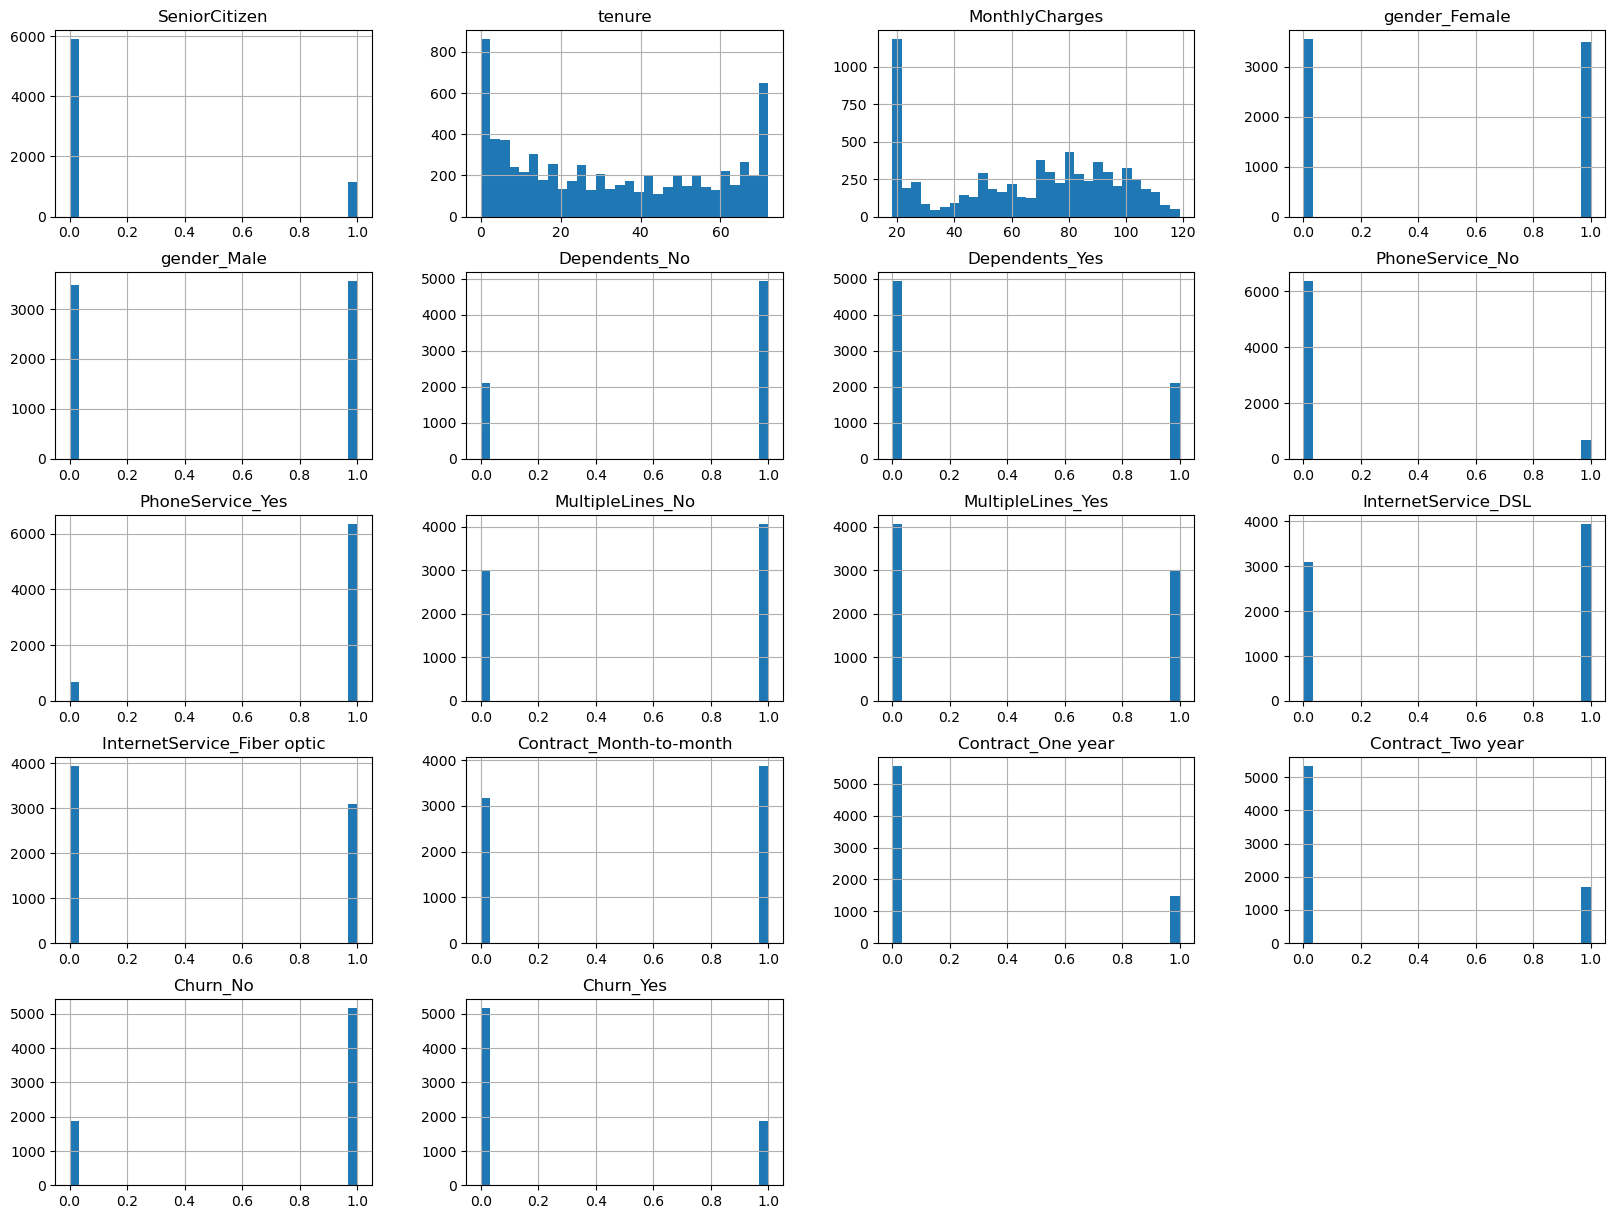

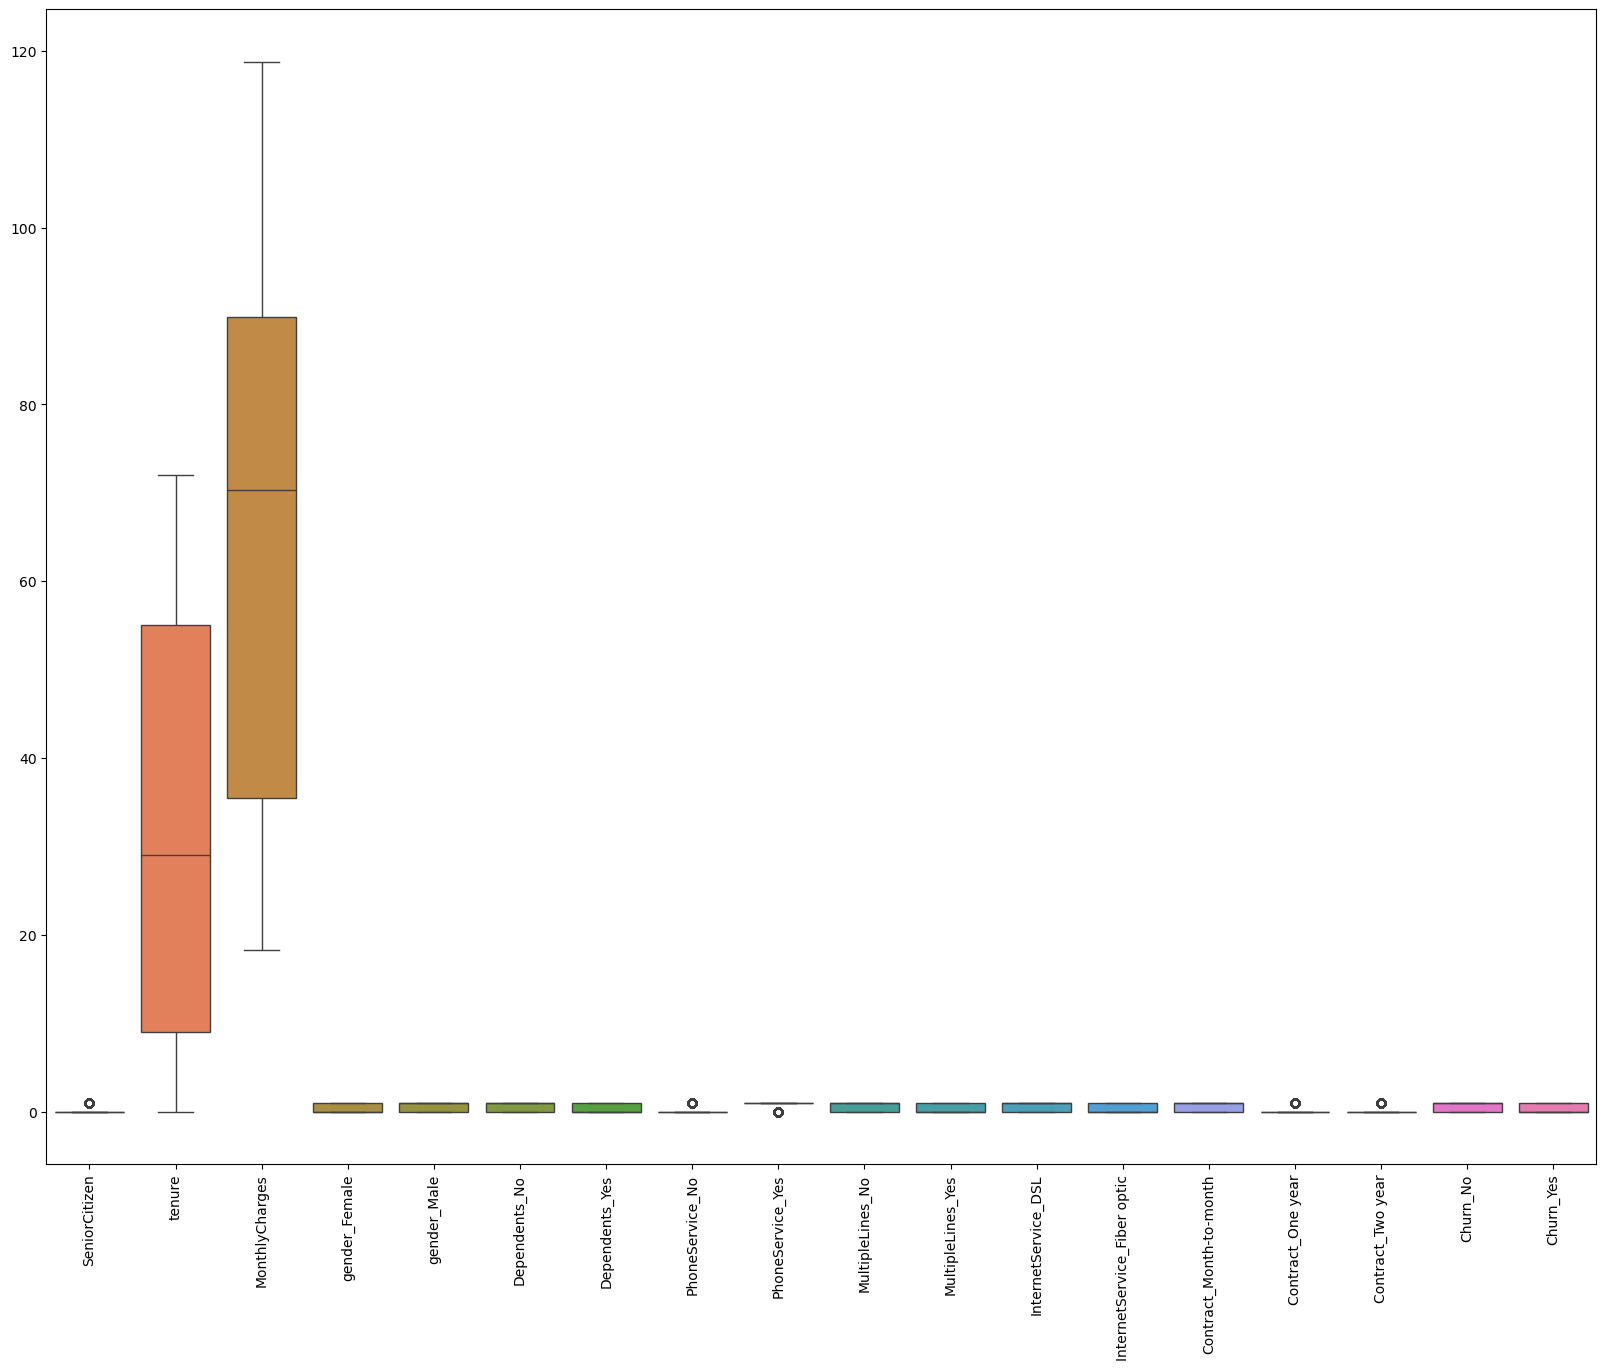

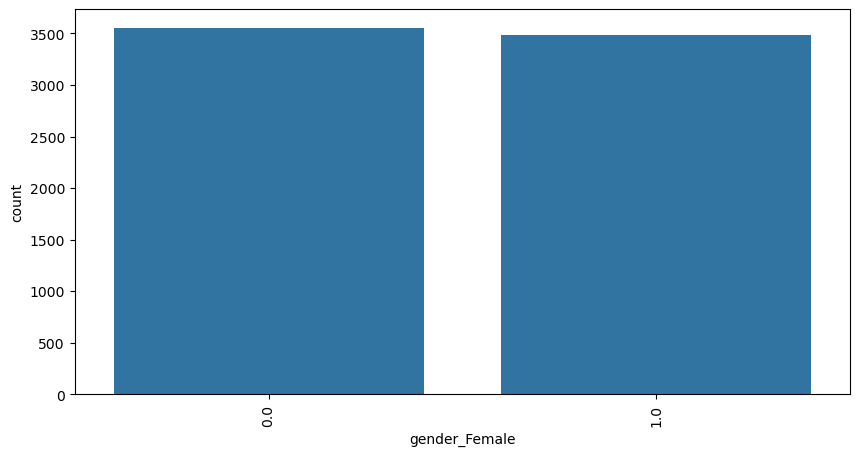

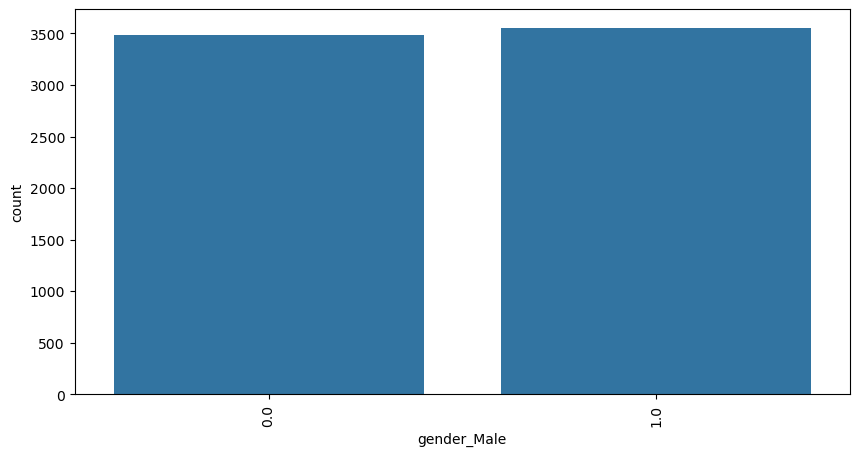

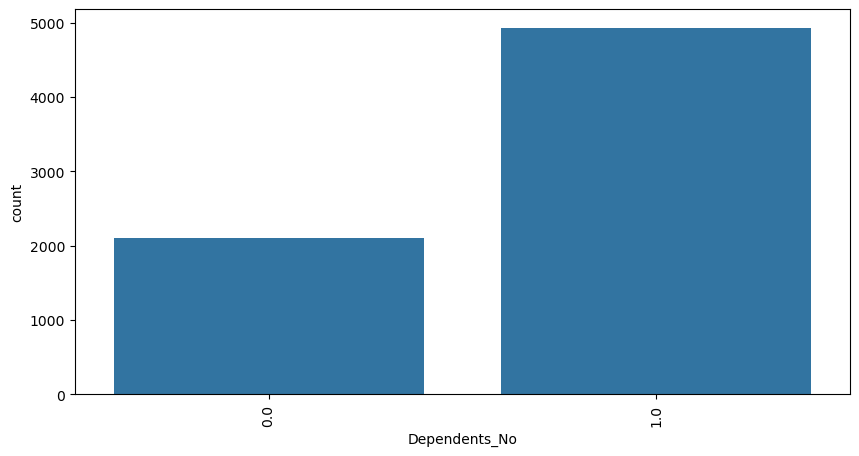

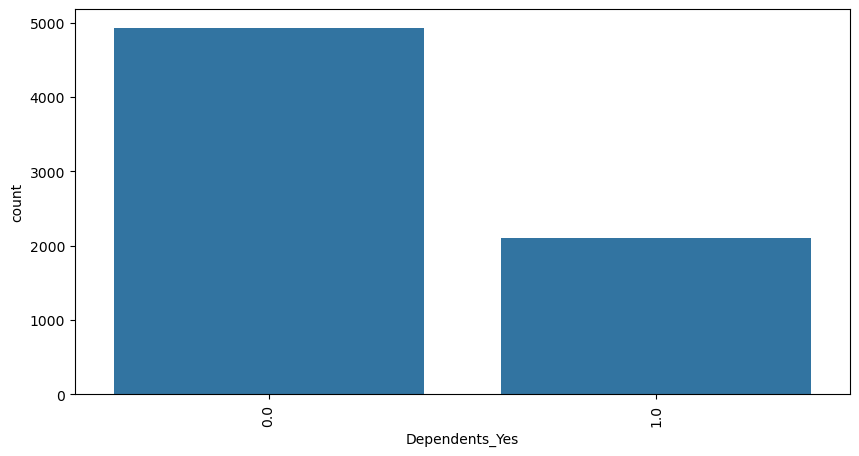

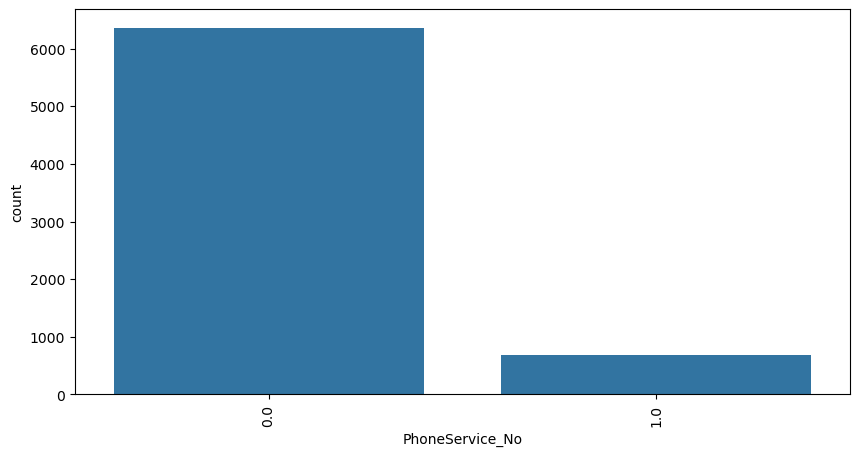

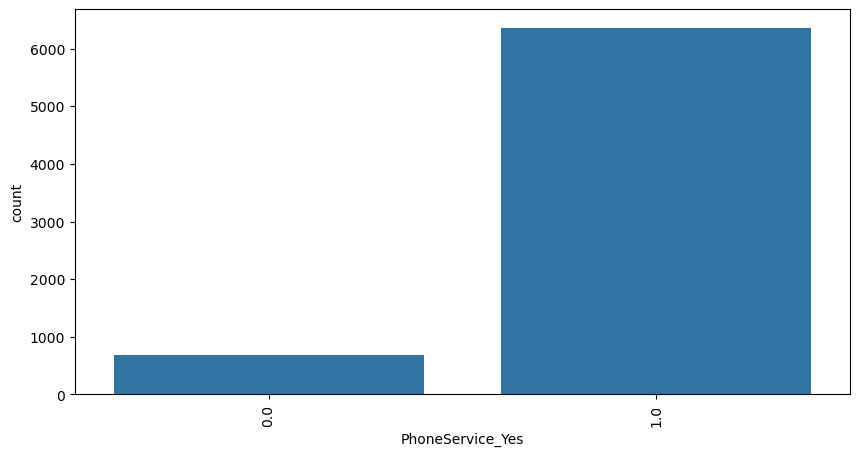

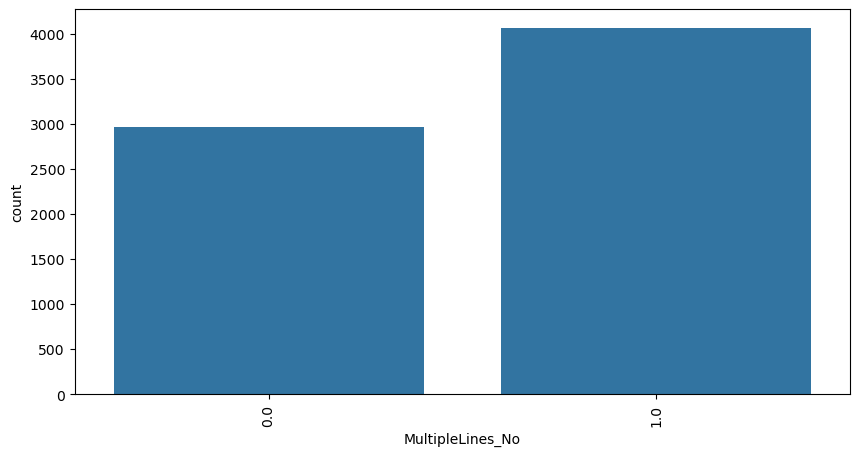

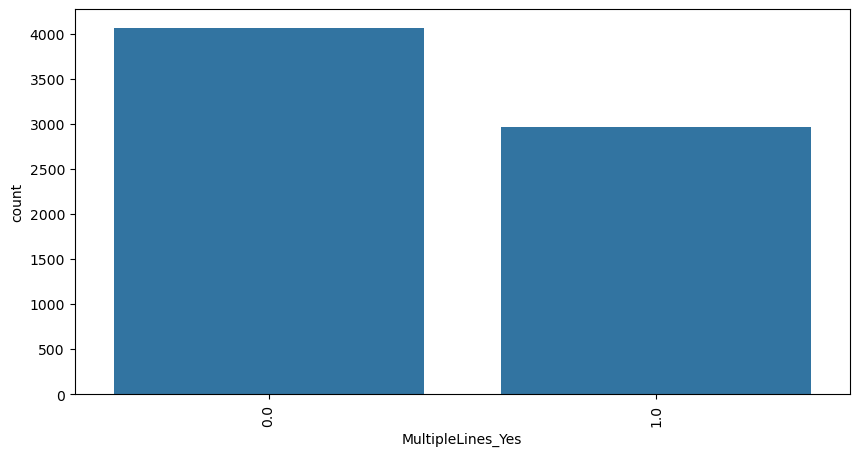

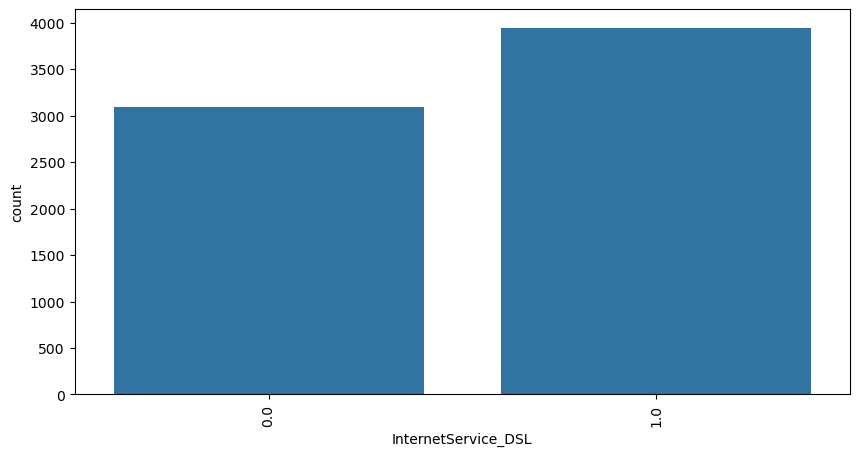

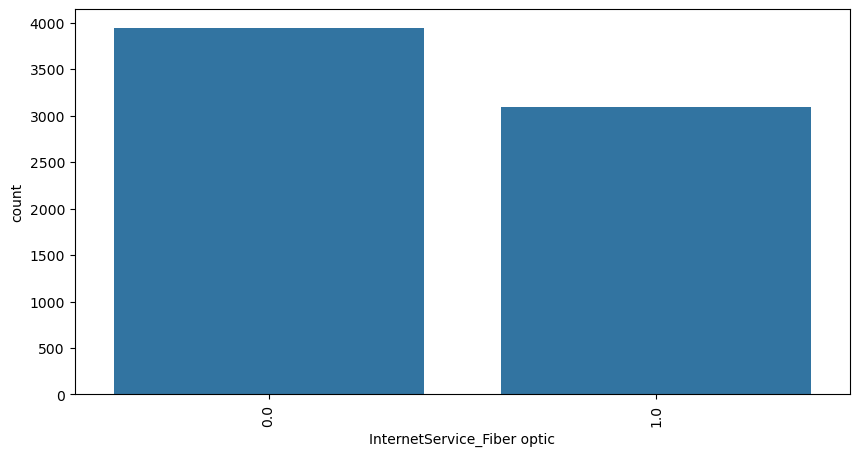

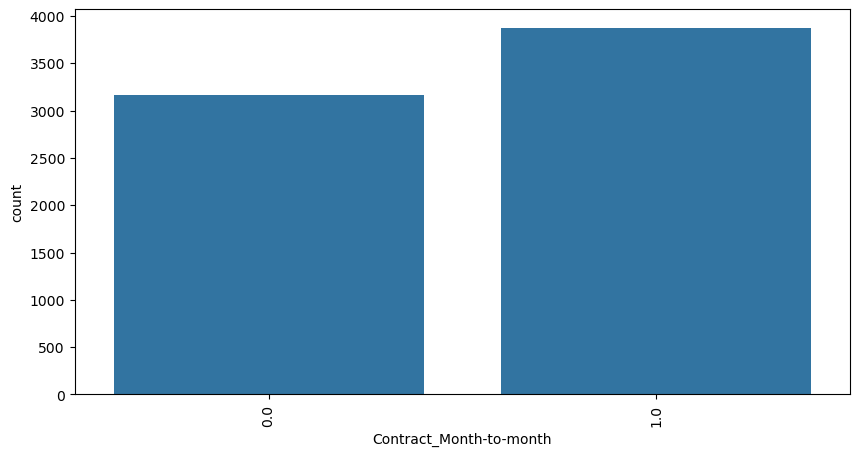

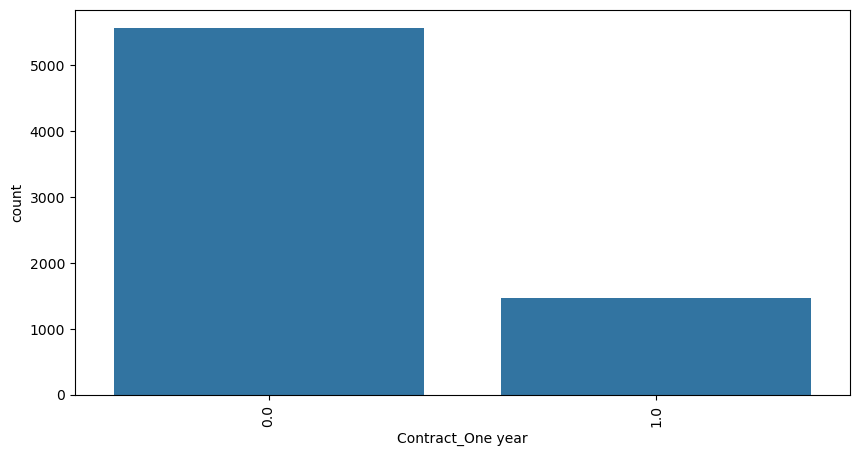

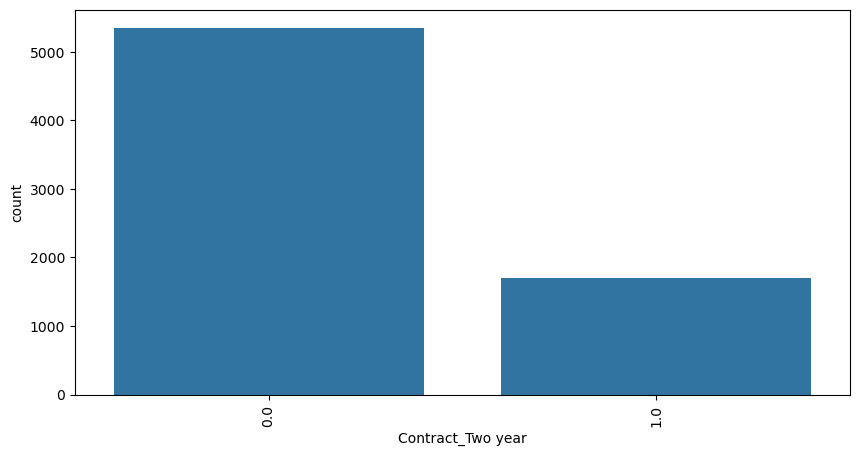

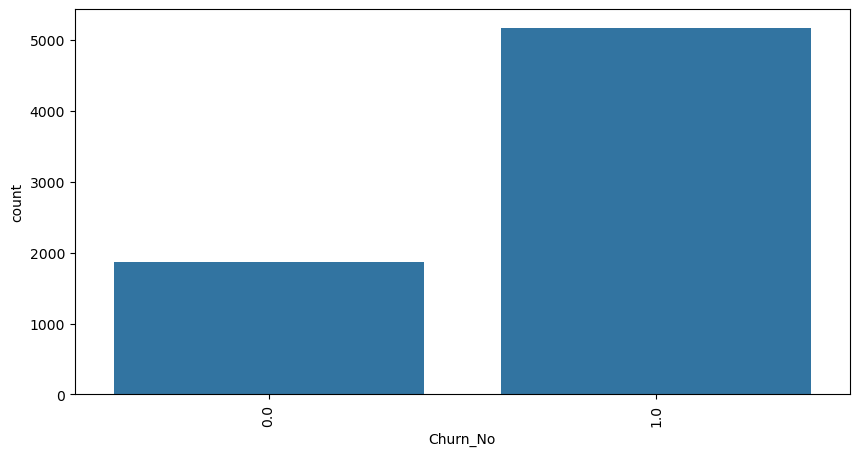

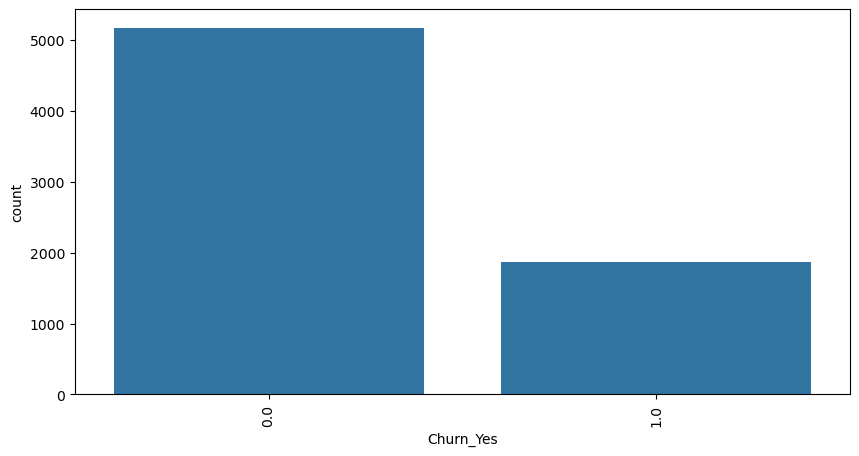

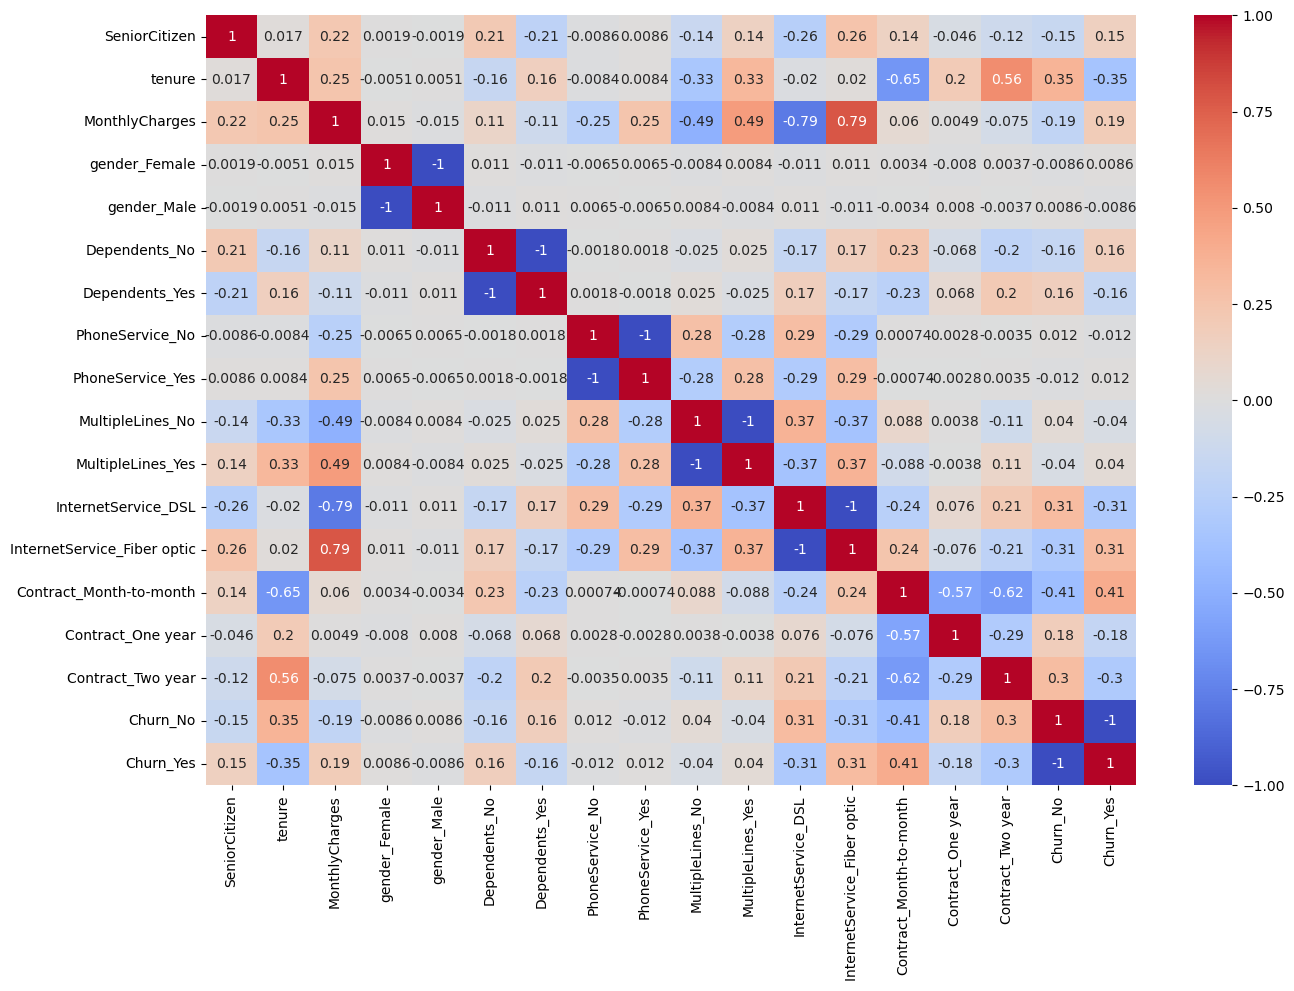

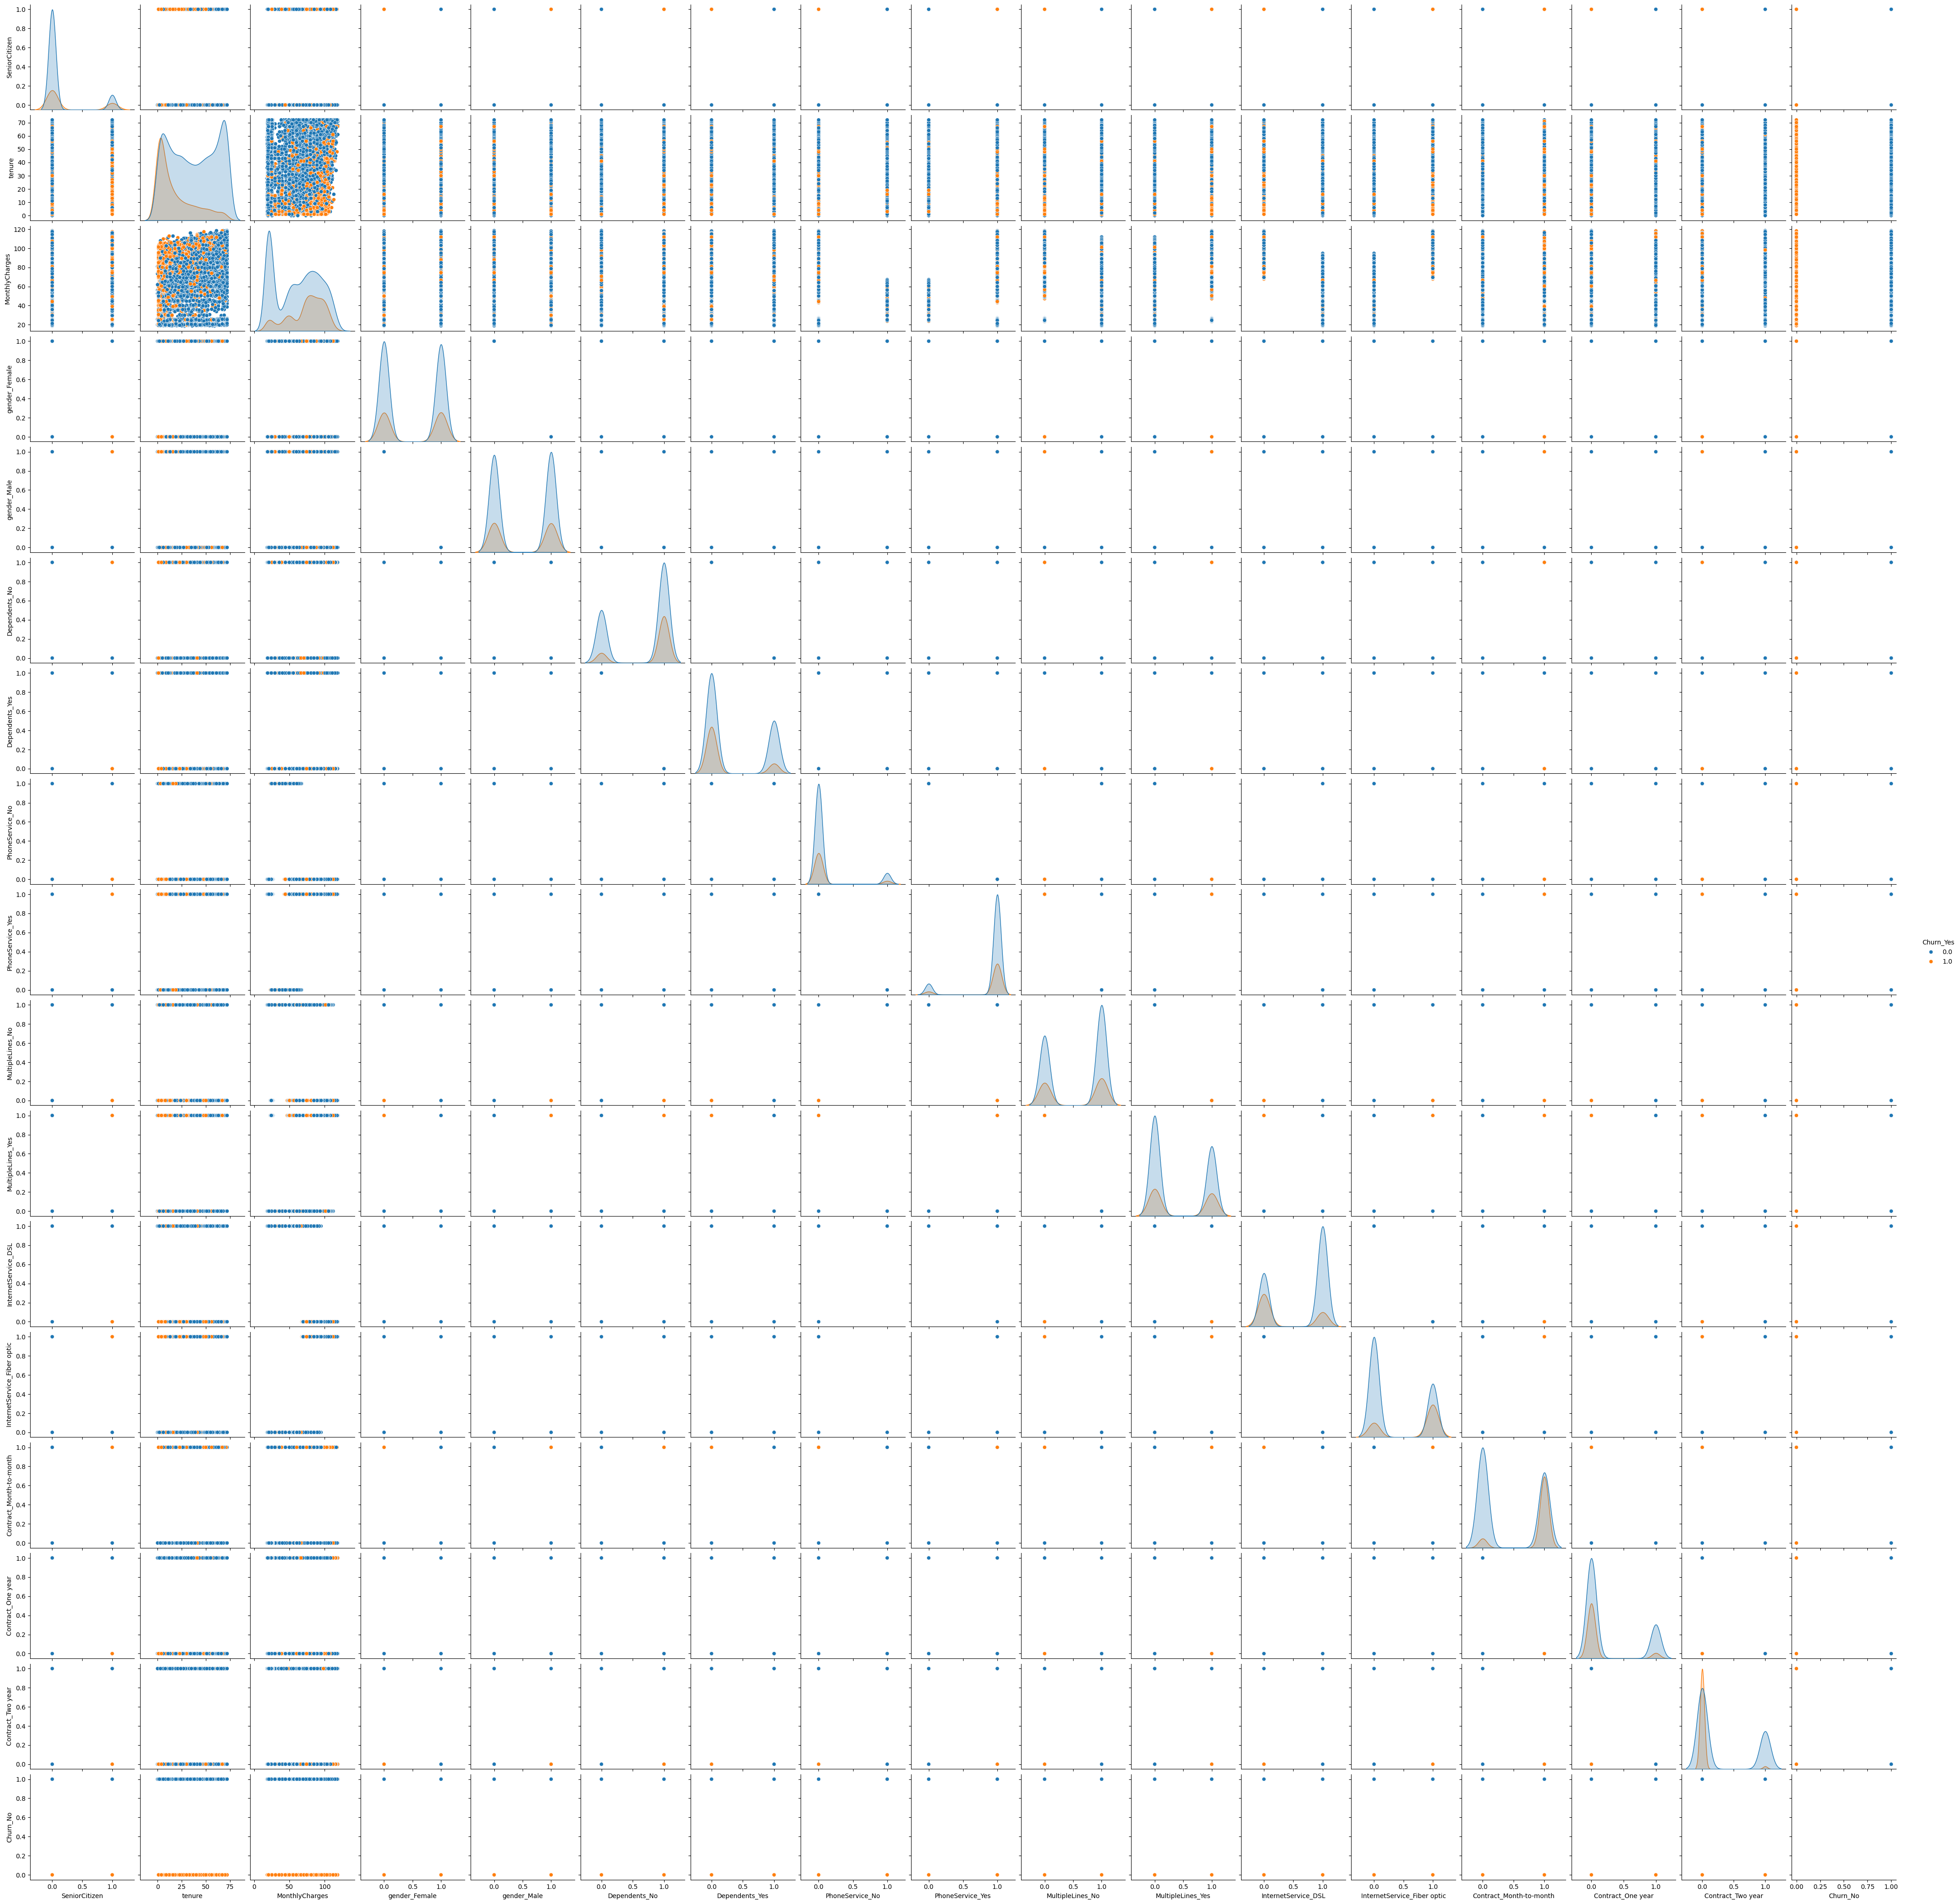

In [13]:
def perform_eda(df):
    """
    Perform exploratory data analysis on the dataframe.
    """
    # Plot distributions
    plot_distribution(df, df.columns)

    # Plot boxplots
    plot_boxplots(df, df.columns)

    # Plot categorical variables
    categorical_columns = ['gender_Female', 'gender_Male', 'Dependents_No', 'Dependents_Yes',
                           'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
                           'InternetService_DSL', 'InternetService_Fiber optic', 'Contract_Month-to-month',
                           'Contract_One year', 'Contract_Two year', 'Churn_No', 'Churn_Yes']
    plot_categorical(df, categorical_columns)

    # Plot correlation matrix
    plot_correlation_matrix(df)

    # Plot pairplots
    plot_pairplots(df, hue='Churn_Yes')

# Perform EDA before feature engineering
perform_eda(df_cleaned)


## Step 5: Apply Scaling Techniques
Apply standard scaling and min-max scaling to the dataset to standardize the features.

In [14]:
# Apply scaling techniques
df_standard_scaled = apply_standard_scaling(df_cleaned)
df_min_max_scaled = apply_min_max_scaling(df_cleaned)

# Save the scaled datasets
standard_scaled_data_path = os.path.join(project_root, 'Data_Preparation', 'scaling_techniques', 'standard_scaled_dataset.csv')
min_max_scaled_data_path = os.path.join(project_root, 'Data_Preparation', 'scaling_techniques', 'min_max_scaled_dataset.csv')
df_standard_scaled.to_csv(standard_scaled_data_path, index=False)
df_min_max_scaled.to_csv(min_max_scaled_data_path, index=False)
print(f"Standard scaled data saved to {standard_scaled_data_path}")
print(f"Min-Max scaled data saved to {min_max_scaled_data_path}")

Numeric columns for scaling: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female',
       'gender_Male', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Churn_No', 'Churn_Yes'],
      dtype='object')
Standard scaling applied.
Numeric columns for scaling: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Female',
       'gender_Male', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Churn_No', 'Churn_Yes'],
      dtype='object')
Min-Max scaling applied.
Standard scaled data saved to /Users/bchaudhary/Desktop/Customer-Churn-Analysis/D

## Step 6: Feature Engineering
Create new features from the cleaned dataset to enhance the dataset for further analysis and modeling.

In [15]:
# Create new features from the cleaned dataset
df_features = create_new_features(df_cleaned)
# Save the dataset with new features to the processed path
df_features.to_csv(processed_data_path, index=False)
print(f"Dataset with new features saved to {processed_data_path}")
display(df_features.head())

Dataset with new features saved to /Users/bchaudhary/Desktop/Customer-Churn-Analysis/data/processed/processed_dataset_with_features.csv


,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn_No,Churn_Yes,Charges_Per_Tenure,TotalCharges
0,0,1,29.85,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,14.925000,29.85
1,0,34,56.95,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.627143,1936.30
2,0,2,53.85,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,17.950000,107.70
3,0,45,42.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.919565,1903.50
4,0,2,70.70,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,23.566667,141.40


## Step 7: Split Data into Training and Testing Sets
In this step, we will split the processed data with new features into training and testing datasets for model training and evaluation.



In [16]:
# Define the target column
target_column = 'Churn_Yes'

# Split the processed data with new features into training and testing datasets
train_df, test_df = split_data(df_features, target_column=target_column)

# Save the training and testing datasets to their respective paths
train_path = os.path.join(project_root, 'data', 'train', 'train_dataset.csv')
test_path = os.path.join(project_root, 'data', 'test', 'test_dataset.csv')

train_path_prep = os.path.join(project_root, 'Data_Preparation', 'training_sets', 'train_dataset.csv')
test_path_prep = os.path.join(project_root, 'Data_Preparation', 'testing_sets', 'test_dataset.csv')

os.makedirs(os.path.dirname(train_path), exist_ok=True)
os.makedirs(os.path.dirname(test_path), exist_ok=True)
os.makedirs(os.path.dirname(train_path_prep), exist_ok=True)
os.makedirs(os.path.dirname(test_path_prep), exist_ok=True)

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
train_df.to_csv(train_path_prep, index=False)
test_df.to_csv(test_path_prep, index=False)

print(f"Training dataset saved to {train_path} and {train_path_prep}")
print(f"Testing dataset saved to {test_path} and {test_path_prep}")

Data split into training (size=5634) and testing (size=1409) sets.
Training dataset saved to /Users/bchaudhary/Desktop/Customer-Churn-Analysis/data/train/train_dataset.csv and /Users/bchaudhary/Desktop/Customer-Churn-Analysis/Data_Preparation/training_sets/train_dataset.csv
Testing dataset saved to /Users/bchaudhary/Desktop/Customer-Churn-Analysis/data/test/test_dataset.csv and /Users/bchaudhary/Desktop/Customer-Churn-Analysis/Data_Preparation/testing_sets/test_dataset.csv


## Overall Summary

In this notebook, we have successfully performed the following tasks:
 - Data Loading and Cleaning: Loaded the raw dataset and cleaned it to handle missing values and encode categorical variables.
 - Exploratory Data Analysis (EDA): Conducted EDA to visualize distributions, correlations, and relationships within the dataset.
 - Feature Engineering: Created new features to enhance the dataset for better analysis and modeling.
 - Scaling: Applied standard scaling and min-max scaling to standardize the features.
 - Data Splitting: Split the dataset into training and testing sets for model training and evaluation.

## Results Obtained:
 - Cleaned and transformed dataset ready for analysis.
 - Visualizations and insights from EDA.
 - New features added to the dataset.
 - Scaled datasets saved for further analysis.
 - Training and testing datasets saved for model development.

## Next Steps:
 - Model Training: Use the training dataset to train various machine learning models.
 - Model Evaluation: Evaluate the performance of the trained models using the testing dataset.
 - Model Selection: Select the best-performing model based on evaluation metrics.
 - Deployment: Prepare the selected model for deployment in a real-world environment.